# Clothing Review Classification Project
## Overview
This project focuses on analyzing and classifying clothing store reviews using Natural Language Processing (NLP) techniques. The dataset contains customer reviews with features like review text, title, rating, and recommendation flag. The goal is to preprocess the text data and build classification models to predict whether a review recommends the product or not.

## Key Steps Performed:

#### Data Preprocessing:

- Tokenization of review text and titles
- Stopword removal
- Handling infrequent words
- Vocabulary generation

#### Feature Engineering:

- Bag-of-Words representation
- TF-IDF weighted vectors
- GloVe word embeddings (both unweighted and weighted versions)

#### Model Building:

- Logistic Regression classifier
- Evaluation using 5-fold cross-validation
- Performance comparison across different feature representations

### Disclaimer & Usage Instructions

This notebook includes a few functions that are derived from university course materials. I acknowledge their source and do not claim ownership of those specific code segments—they are used here purely for academic purposes as part of what has been taught at my university. To ensure smooth execution, please download the entire directory as it contains all the necessary files. I've included tVector.txt and vocab.txt for context; these will be automatically updated if your version of the code runs successfully.

Before running this notebook, please make sure the following files are available in the directory:

- Data.csv
- stopwords_en.txt


In [3]:
import nltk
from itertools import chain
import pandas as pd
import numpy as np

# Code to inspect the provided data file...
data = pd.read_csv("Data.csv")
data

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...
19657,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
19658,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
19659,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
19660,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


We only want to access the actual review and perform processing on that. Thus we fetch only the "Review Text" column from our dataframe. To understand our processing in the next steps, We decide to target only a single data entry to examine the processing as we go. Here, the index of the random data entry is set to 15

In [5]:
review_data_df = data["Review Text"]
review_data = [review for review in review_data_df]
print(len(review_data))


19662


In [6]:
# Marking a review as an example for observing the processing
exp = 15
review_data[exp]

"A flattering, super cozy coat.  will work well for cold, dry days and will look good with jeans or a dressier outfit.  i am 5' 5'', about 135 and the small fits great."

In [7]:
def tokenizeReview(review):
    # This function tokenizes with the given regular expression.  
    # Cover all words to lowercase
    new_rev = review.lower() 
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
    tokenizer = nltk.RegexpTokenizer(pattern) 
    tokenised_review = tokenizer.tokenize(new_rev)
    return tokenised_review

In [8]:
tokenized_reviews = [tokenizeReview(review) for review in review_data]
tokenized_reviews[exp]

['a',
 'flattering',
 'super',
 'cozy',
 'coat',
 'will',
 'work',
 'well',
 'for',
 'cold',
 'dry',
 'days',
 'and',
 'will',
 'look',
 'good',
 'with',
 'jeans',
 'or',
 'a',
 'dressier',
 'outfit',
 'i',
 'am',
 'about',
 'and',
 'the',
 'small',
 'fits',
 'great']

Tokenization - It is an important process where in we process the data into a simpler format for efficient modelling. It normally refers to longer strings broken into shorter strings - individual strings. We create a function - tokenizeReview with all the processing required. 

- Converting to lower case
- Using RegexpTokenizer method to pattern match to remove numbers
- Using the ntlk tokenize() method to do the rest

def tokenizeReview(review):
    # This function tokenizes with the given regular expression.  
    # Cover all words to lowercase
    new_rev = review.lower() 
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
    tokenizer = nltk.RegexpTokenizer(pattern) 
    tokenised_review = tokenizer.tokenize(new_rev)
    return tokenised_review

tokenized_reviews = [tokenizeReview(review) for review in review_data]
tokenized_reviews[exp]

We also define a statistics function to keep track of statistics as we process the data.

In [12]:
# Defining a statistics function to keep track of statistics
def stats_print(reviews):
    # We put all the tokens in the corpus in a single list
    words = list(chain.from_iterable(reviews)) 
    # Compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words
    vocab = set(words) 
    lexical_diversity = len(vocab)/len(words)
    print("Vocabulary size: ",len(vocab))
    print("Total number of tokens: ", len(words))
    print("Lexical diversity: ", lexical_diversity)
    print("Total number of reviews:", len(reviews))
    lens = [len(review) for review in reviews]
    print("Average review length:", np.mean(lens))
    print("Maximun review length:", np.max(lens))
    print("Minimun review length:", np.min(lens))
    print("Standard deviation of review length:", np.std(lens))

In [13]:
stats_print(tokenized_reviews)

Vocabulary size:  14806
Total number of tokens:  1206688
Lexical diversity:  0.012269948818584423
Total number of reviews: 19662
Average review length: 61.37157969687723
Maximun review length: 113
Minimun review length: 2
Standard deviation of review length: 27.802596969841698


Finally, we move to the final processing data. We'll talk about it step by step

First let's remove the words who have length less than 2. They often include words like "is", 'it', 'as', 'am', 'I' which often can be removed whilst maintaing the context with its previous & following words

In [16]:
# Iterate over tokenized_reviews and update each review
for i, review in enumerate(tokenized_reviews):
    # Create a new list with words of length greater than 2
    new_rev = [word for word in review if len(word) >= 2] 
    # Update the tokenized_reviews list with the filtered words
    tokenized_reviews[i] = new_rev
    
tokenized_reviews[exp]

['flattering',
 'super',
 'cozy',
 'coat',
 'will',
 'work',
 'well',
 'for',
 'cold',
 'dry',
 'days',
 'and',
 'will',
 'look',
 'good',
 'with',
 'jeans',
 'or',
 'dressier',
 'outfit',
 'am',
 'about',
 'and',
 'the',
 'small',
 'fits',
 'great']

Stopwords are common words like "the," "is," and "and" that carry little meaningful information. We remove them to reduce noise and focus on the more important words that contribute to the overall meaning of the text.

In [18]:
stopwords_reviews = []
with open('stopwords_en.txt') as f:
    stopwords_reviews = f.read().splitlines()

# Converting the stopwords list into a set for better time complexity
stopwordSet = set(stopwords_reviews)
len(stopwordSet)

570

In [19]:
# Filter out stop words
tokenized_reviews = [[w for w in review if w not in stopwordSet] \
                      for review in tokenized_reviews]

Honestly, thats pretty decent preprocessing but we process further to build upon our understanding. 
Thus, we first calculate the term frequency and the doc frequency. 

Term Frequency - Term Frequency (TF) measures how often a word appears in a document, helping identify important words within that text.

Document Frequency - Document Frequency (DF) counts how many documents contain a word, helping assess how common or unique a word is across a collection of documents.

This will smoothen the overall preprocessing process. We can do this by using the pre-existing FreqDist function in the nltk module.

In [21]:
from nltk.probability import *
# Chaining the reviews into a single list
review_words = list(chain.from_iterable(tokenized_reviews))
term_fd = FreqDist(review_words)

Now, we remove the word that appears only once in the document collection based on the term frequency. We first fetch all the words that occur only once using the hapaxes() function

In [23]:
lessFreqWords = set(term_fd.hapaxes())
len(lessFreqWords)

6734

We define a function to remove these words for each review. Then passing the function inside a list comprehension get the new tokenized reviews.

In [25]:
def removeLessFreqWords(review):
    return [w for w in review if w not in lessFreqWords]

tokenized_reviews = [removeLessFreqWords(review) for review in tokenized_reviews]

Now calculating the document Frequency

In [27]:
# Chaining a new review string with unique characters in each review
review_words_2 = list(chain.from_iterable([set(review) for review in tokenized_reviews]))
doc_fd = FreqDist(review_words_2)  
doc_fd.most_common(20)

[('love', 6416),
 ('size', 5888),
 ('fit', 5537),
 ('dress', 5346),
 ('wear', 4900),
 ('top', 4670),
 ('great', 4497),
 ('fabric', 3712),
 ('color', 3604),
 ('small', 3265),
 ('ordered', 3099),
 ('perfect', 2973),
 ('flattering', 2939),
 ('soft', 2805),
 ('comfortable', 2597),
 ('back', 2538),
 ('cute', 2398),
 ('fits', 2394),
 ('nice', 2393),
 ('bought', 2376)]

Now we do the same to remove these top 20 most common words 

In [29]:
top20_docfreq = doc_fd.most_common(20)
top20_docfreq_words = []
# Appending only the word from the freq_list
for word in top20_docfreq:
    top20_docfreq_words.append(word[0])

# Parsing the list for a better lookup time
top20_docfreq_words = (top20_docfreq_words)

def removeTopdocFreqWords(review):
    return [w for w in review if w not in top20_docfreq_words]

tokenized_reviews = [removeTopdocFreqWords(review) for review in tokenized_reviews]

Taking a look at the updated statistics

In [31]:
stats_print(tokenized_reviews)

Vocabulary size:  7529
Total number of tokens:  355505
Lexical diversity:  0.021178323792914306
Total number of reviews: 19662
Average review length: 18.080815786796865
Maximun review length: 47
Minimun review length: 0
Standard deviation of review length: 8.833524535391433


The vocabulary size is reduced to half indicating maximum population of the words belonged to the removed words

Finally, I feel we the data is processed enough. Let's do some final checks. Looking for empty reviews

In [34]:
for i, review in enumerate(tokenized_reviews):
    if review == []:
        print("Found at: index ",i)

Found at: index  4160
Found at: index  6521
Found at: index  11211
Found at: index  11568
Found at: index  12662
Found at: index  12777
Found at: index  13095
Found at: index  14727
Found at: index  15314
Found at: index  18113


In [35]:
data["Processed Reviews"] = tokenized_reviews
# Filter out rows where "Processed Reviews" contains empty lists
data = data[data['Processed Reviews'].apply(lambda x: len(x) > 0)]


In [36]:
data

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Processed Reviews
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[high, hopes, wanted, work, initially, petite,..."
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[jumpsuit, fun, flirty, fabulous, time, compli..."
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, due, adjustable, front, tie, length, l..."
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"[tracy, reese, dresses, petite, feet, tall, br..."
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,"[basket, hte, person, store, pick, teh, pale, ..."
...,...,...,...,...,...,...,...,...,...,...,...
19657,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"[happy, snag, price, easy, slip, cut, combo]"
19658,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"[reminds, maternity, clothes, stretchy, shiny,..."
19659,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"[worked, glad, store, order, online]"
19660,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"[wedding, summer, medium, waist, perfectly, lo..."


Also, generating a vocabulary

Vocabulary - In modeling, Vocabulary stands for all the unique words in the data. 

In [38]:
words = list(chain.from_iterable(tokenized_reviews)) 
vocab = set(words)
vocab = sorted(vocab)

with open('vocab.txt', 'w') as f:
    for index, word in enumerate(vocab):
        f.write(f"{word}:{index}\n")

Now that the data is cleaned, Lets move with the processing for the next steps. We'll build vector representations of the models. I have used a prebuilt glove_model with 50 dimensions for the sake of faster processing. It is a solid model but you can use any other model in that same format. Please examine the model from the working directory before using your own model

Let's extract the review data into a list for vectorization. Plus combining all the review text into a continous string for bag-of words model.

In [40]:
review_df = data['Processed Reviews']
reviews = [' '.join(review) for review in review_df]
print(len(reviews))

19652


Generating Feature Representation - We create a CountVector representation using the countVectorizer from the scikit learn module. We pass our vocab as the vocab for the model

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocab)
count_features = cVectorizer.fit_transform(reviews) 
count_features.shape

(19652, 7529)

Now, Similarly we can make the TF-IDF weighted vector representation by using the TF-IDF vectorizer from the sci-kit learn module.
We'll need this later to calculate the TF-IDF word embeddings based on the Glove Model

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = vocab) 
tfidf_features = tVectorizer.fit_transform(reviews) 
tfidf_features.shape 

(19652, 7529)

In [45]:
tfidf_feature_names = tVectorizer.get_feature_names_out()
tfidf_feature_names

array(['a-cup', 'a-flutter', 'a-frame', ..., 'zips', 'zone', 'zoom'],
      dtype=object)

Before we proceed, we define a function docvecs which will be used to vectorize each document from the data
In our case, each review would be vectorized based on the embeddings passed. Finally it takes the sum of all the values (words) and appends it to the final df creating a list of vectors one for each review

In [47]:
def docvecs(embeddings, docs):
    vecs = np.zeros((len(docs), embeddings.vector_size))
    for i, doc in enumerate(docs):
        valid_keys = [term for term in doc if term in embeddings.key_to_index]
        docvec = np.vstack([embeddings[term] for term in valid_keys])
        docvec = np.sum(docvec, axis=0)
        vecs[i,:] = docvec
    return vecs

Now, I have used the Glove model which I got from my University. You can use many such models which are available online - Word2Vec, FastText, etc. Make sure you inspect the Glove model from the directory before using your own model. They all should be in the same format (most cases). 

For the model, we first extract its embeddings into KeyedVectors. KeyedVectors - basically extract the values of its key & weights to apply to our data. 

In [49]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install scipy==1.12

Note: you may need to restart the kernel to use updated packages.


Loading the Glove model from my Hugging Face repository. Since the model exceeds 100mb - I used Hugging face to host the model
You can use your own model here and modify this code accordingly to load your model

In [52]:
import os
import requests

# Define the URL and local filename
glove_url = "https://huggingface.co/datasets/Jay-Mayekar/glove-vectors/resolve/main/glove.6B.50d.txt"
glove_path = "glove.6B.50d.txt"

# Download the file if not present
if not os.path.exists(glove_path):
    print("Downloading GloVe embeddings from Hugging Face...")
    response = requests.get(glove_url)
    with open(glove_path, 'wb') as f:
        f.write(response.content)
    print("Download complete.")
else:
    print("GloVe model already exists locally.")


Download complete.


In [53]:
from gensim.models import KeyedVectors

with open(glove_path,encoding="utf8") as f:
    keys, weights = [], []
    for l in f:
        k, v = l.split(maxsplit=1)
        keys.append(k)
        weights.append(np.fromstring(v, sep=' '))
glove_embeddings = KeyedVectors(50, count=400000)
glove_embeddings.add_vectors(keys, weights)
preTrained_Glove_wv = glove_embeddings

Now, Applying these extracted embeddings to our reviews. This gives us unweighted embeddings representation for our data. Keep in mind the "weights" referred previously for this glove model are the generic weights preexisting in the glove model, thus we call the output as unweighted as it does not take the "weights" (generated by us) into account

In [55]:
preTGloVe_dvs = docvecs(preTrained_Glove_wv , data["Processed Reviews"])
preTGloVe_dvs[0]

array([ 3.57157302e+00, -3.96359205e+00,  3.31884074e+00, -6.83513212e+00,
        8.01658821e+00,  5.30020332e+00, -4.29943085e+00, -1.00662270e+01,
        2.33869982e+00,  1.21137202e+00,  2.73536777e+00, -3.02923322e-02,
       -4.01857710e+00,  4.96555233e+00,  6.82524681e-01,  3.60882449e+00,
        9.97775972e-01, -1.20634401e+00,  6.42051250e-02, -1.47975597e+01,
       -1.44129407e+00, -7.41323137e+00,  5.38263083e+00, -4.94232595e-01,
       -3.16907072e+00, -2.30365410e+01, -8.68683815e+00,  1.71912041e+01,
        1.31793699e+01, -8.01629734e+00,  6.85179901e+01, -2.17898786e-02,
        7.81168747e+00, -1.46274626e+00,  2.36876106e+00,  7.57402039e+00,
       -3.80273843e+00,  1.46780090e+01,  3.06831312e+00, -9.08834839e+00,
        2.60966492e+00,  6.33448958e-01,  6.21696711e+00,  2.84020877e+00,
       -7.33742666e+00, -7.12737679e-01,  8.26390553e+00, -2.39080340e-01,
        2.97417307e+00, -2.44539618e+00])

In [56]:
preTGloVe_dvs.shape

(19652, 50)

Now, lets focus on the weighted embeddings. Weights are the values that denote the significance or importance of a certain object(words in our case) in the context of the data. We calculated the weights previously by using the TF-IDF method. Let's bring them back in the picture

In [58]:
tfidf_scores = tfidf_features.toarray()
len(tfidf_scores)

19652

Generating a word_index: word dictionary from our vocab.txt We need this to generate the TF-IDF weighted vectors

In [60]:
def gen_vocIndex(voc_fname):
    with open(voc_fname) as vocf: 
        # Each line is 'word:index'
        voc_Ind = [l.split(':') for l in vocf.read().splitlines()] 
        return {int(vi[1]):vi[0] for vi in voc_Ind}

# Generates the w_index:word dictionary
voc_fname = 'vocab.txt' 
voc_dict = gen_vocIndex(voc_fname)

Before, we proceed with applying the glove embeddings to our TF-IDF values. Let's first save our TF-IDF vector representation into a text file which we can access later using the below function
This function takes in the features_names and the filename for any vector and stores in word_index:value format


In [62]:
def write_vectorFile(data_features,filename):
    # The number of articles
    num = data_features.shape[0] 
    out_file = open(filename, 'w') 
    for a_ind in range(0, num): 
        # For each word index that has non-zero entry in the data_feature
        for f_ind in data_features[a_ind].nonzero()[1]: 
            value = data_features[a_ind][0,f_ind] 
            # Write the entry to the file in the format of word_index:value
            out_file.write("{}:{} ".format(f_ind,value)) 
        out_file.write('\n') 
    out_file.close() 

write_vectorFile(tfidf_features,"tVector.txt")

def doc_wordweights(fName_tVectors, voc_dict):
    # A list to store the  word:weight dictionaries of documents
    tfidf_weights = [] 
    
    with open(fName_tVectors) as tVecf: 
        tVectors = tVecf.read().splitlines() # each line is a tfidf vector representation of a document in string format 'word_index:weight word_index:weight .......'
        # for each tfidf document vector
    for tv in tVectors: 
        tv = tv.strip()
        weights = tv.split(' ') # list of 'word_index:weight' entries
        weights = [w.split(':') for w in weights] # change the format of weight to a list of '[word_index,weight]' entries
        wordweight_dict = {voc_dict[int(w[0])]:w[1] for w in weights} # construct the weight dictionary, where each entry is 'word:weight'
        tfidf_weights.append(wordweight_dict) 
    return tfidf_weights

fName_tVectors = 'tVector.txt'
tfidf_weights = doc_wordweights(fName_tVectors, voc_dict)

Alright, That was a bit too much of code. Lets examine the tfidf_weights

In [64]:
tfidf_weights[0]

{'zipper': '0.13796655643162234',
 'zip': '0.15790936302533073',
 'work': '0.08942754431903749',
 'wanted': '0.10688230992054923',
 'usual': '0.1108979967093157',
 'tight': '0.09944270371682062',
 'sewn': '0.15731076193390778',
 'reordered': '0.20116611478729465',
 'petite': '0.17993461419688872',
 'outrageously': '0.2567966207221875',
 'nicely': '0.11400095142158763',
 'net': '0.4867876227942154',
 'medium': '0.09045659947118836',
 'major': '0.19468911285051188',
 'layers': '0.16401760637664864',
 'layer': '0.2738967869996706',
 'initially': '0.17097793161240013',
 'imo': '0.19309847172209627',
 'hopes': '0.16844705121993458',
 'high': '0.10509713403953778',
 'half': '0.29992142257858656',
 'found': '0.11016820762903567',
 'flaw': '0.1869368578273477',
 'fact': '0.14687037381367216',
 'directly': '0.22042366265962396',
 'design': '0.0981905331970358',
 'cheap': '0.13834681733551207',
 'bottom': '0.10490905048781156'}

Finally, we define a function which will generate the weighted document embeddings

In [66]:
def weighted_docvecs(embeddings, tfidf, docs):
    vecs = np.zeros((len(docs), embeddings.vector_size))
    for i, doc in enumerate(docs):
        valid_keys = [term for term in doc if term in embeddings.key_to_index]
        tf_weights = [float(tfidf[i].get(term, 0.)) for term in valid_keys]
        assert len(valid_keys) == len(tf_weights)
        weighted = [embeddings[term] * w for term, w in zip(valid_keys, tf_weights)]
        docvec = np.vstack(weighted)
        docvec = np.sum(docvec, axis=0)
        vecs[i,:] = docvec
    return vecs

#Here, we pass the dataframe column itself since each element inside our df is a list of tokens
weighted_preTrained_Glove_dvs = weighted_docvecs(preTrained_Glove_wv, tfidf_weights, data["Processed Reviews"])
weighted_preTrained_Glove_dvs[100]

array([-7.59977520e-01, -1.92892775e-01, -6.64334118e-01, -5.46065681e-02,
        1.63867283e+00, -9.06967938e-01, -6.00465298e-01,  4.24000435e-02,
       -7.81980574e-01, -6.76829159e-01, -9.17282820e-01, -4.17724371e-01,
       -5.99205375e-01,  9.44996119e-01,  3.76190066e-01,  8.59460473e-01,
       -9.81933594e-01, -4.46239054e-01,  8.59710723e-02, -2.84964967e+00,
        3.30249786e-01,  1.06721950e+00, -1.45591632e-01, -2.57114649e-01,
       -4.13771838e-01, -2.41196752e+00, -7.88188457e-01,  2.39681339e+00,
        2.35659385e+00, -9.96977031e-01,  7.15750122e+00,  4.26397234e-01,
        9.89538312e-01,  1.10015762e+00, -4.04059350e-01, -1.34081542e-01,
        2.92902291e-01,  6.53782189e-01, -2.62964636e-01, -1.15668774e+00,
       -1.49173126e-01, -6.43850490e-03,  3.96176904e-01,  1.31000030e+00,
        2.73277253e-01, -2.21045643e-01, -2.95024753e-01, -2.65133810e+00,
       -1.48373589e-01,  3.03464234e-01])

In [67]:
weighted_preTrained_Glove_dvs.shape

(19652, 50)

Now that we have all the embeddings.
- Bag of Words
- Unweighted
- Weighted

Let's build Classfication models based on our Vector Representation

Logisitic Regression based - Classification Model

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

seed = 15
# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split( count_features ,data['Recommended IND'], list(range(0,len(data))),test_size=0.2, random_state=seed)
max_iter = 1000
model = LogisticRegression(max_iter = max_iter,random_state=seed) # increase the max_iter to 2000 for convergence
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8768761129483592

Let's Examine the result further using a confusion matrix

Text(0.5, 23.52222222222222, 'Predicted')

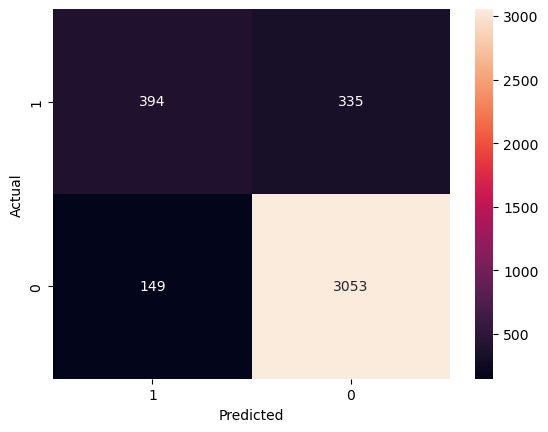

In [72]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

categories = [1,0] # this gives sorted set of unique label names

sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories, yticklabels=categories) # creates a heatmap from the confusion matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')

Now for the unweighted embeddings

In [74]:
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split( preTGloVe_dvs ,data['Recommended IND'], list(range(0,len(data))),test_size=0.2, random_state=seed)
max_iter = 1000
model = LogisticRegression(max_iter = max_iter,random_state=seed) 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8145510048333757

Now for the weighted embeddings

In [76]:
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split( weighted_preTrained_Glove_dvs ,data['Recommended IND'], list(range(0,len(data))),test_size=0.2, random_state=seed)
max_iter = 1000
model = LogisticRegression(max_iter = max_iter,random_state=seed)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8173492749936403

Finally, let's fine tune this process using Kfold Cross Validation across all the models
Also - I defined a evaluate function just to help ease the process

In [78]:
from sklearn.model_selection import KFold
num_folds = 5
# Initialise a 5 fold validation
kf = KFold(n_splits= num_folds, random_state=seed, shuffle = True) 
def evaluate(X_train,X_test,y_train, y_test,seed, max_iter):
    model = LogisticRegression(max_iter =  max_iter,random_state=seed)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

Let's test the validation and store the results into a seperate df

In [80]:
num_models = 3
# Creates a dataframe to store the accuracy scores in all the folds
cv_df = pd.DataFrame(columns = ['Count','Un-weighted','Weighted'],index=range(num_folds)) 

seed = 0
max_iter =  2000
fold = 0
for train_index, test_index in kf.split(list(range(0,len(data)))):
    y_train = [data['Recommended IND'].iloc[i] for i in train_index]
    y_test = [data['Recommended IND'].iloc[i] for i in test_index]

    X_train_binary, X_test_binary = count_features[train_index], count_features[test_index]
    cv_df.loc[fold,'Count'] = evaluate(count_features[train_index],count_features[test_index],y_train,y_test,seed,max_iter =  max_iter)
    
    X_train_count, X_test_count = preTGloVe_dvs[train_index], preTGloVe_dvs[test_index]
    cv_df.loc[fold,'Un-weighted'] = evaluate(preTGloVe_dvs[train_index],preTGloVe_dvs[test_index],y_train,y_test,seed, max_iter =  max_iter)

    X_train_tfidf, X_test_tfidf = weighted_preTrained_Glove_dvs[train_index], weighted_preTrained_Glove_dvs[test_index]
    cv_df.loc[fold,'Weighted'] = evaluate(weighted_preTrained_Glove_dvs[train_index],weighted_preTrained_Glove_dvs[test_index],y_train,y_test,seed, max_iter =  max_iter)

    fold +=1

cv_df

,Count,Un-weighted,Weighted
0,0.876876,0.814297,0.817349
1,0.869499,0.823963,0.826507
2,0.875827,0.824936,0.822901
3,0.871247,0.83028,0.827226
4,0.875827,0.838168,0.831298


In [81]:
cv_df.mean()

Count          0.873855
Un-weighted    0.826329
Weighted       0.825056
dtype: object

Alright, now let's do all the same for the "Title column"

In [83]:
exp = 20
def tokenizetitle(review):
    # This function tokenizes with the given regular expression.  
    # Cover all words to lowercase
    new_rev = review.lower() 
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
    tokenizer = nltk.RegexpTokenizer(pattern) 
    tokenised_review = tokenizer.tokenize(new_rev)
    return tokenised_review

# Defining a statistics function to keep track of statistics
def stats_print(reviews):
    # We put all the tokens in the corpus in a single list
    words = list(chain.from_iterable(reviews)) 
    # Compute the vocabulary by converting the list of words/tokens to a set, i.e., giving a set of unique words
    vocab = set(words) 
    lexical_diversity = len(vocab)/len(words)
    print("Vocabulary size: ",len(vocab))
    print("Total number of tokens: ", len(words))
    print("Lexical diversity: ", lexical_diversity)
    print("Total number of reviews:", len(reviews))
    lens = [len(review) for review in reviews]
    print("Average review length:", np.mean(lens))
    print("Maximun review length:", np.max(lens))
    print("Minimun review length:", np.min(lens))
    print("Standard deviation of review length:", np.std(lens))


def removeLessFreqWords(review):
    return [w for w in review if w not in lessFreqWords]

def removeTopdocFreqWords(review):
    return [w for w in review if w not in top20_docfreq_words]

title_df = data["Title"]
title_data = [title for title in title_df]
tokenized_titles = [tokenizetitle(title) for title in title_data]

stats_print(tokenized_titles)

# Iterate over tokenized_reviews and update each review
for i, title in enumerate(tokenized_titles):
    # Create a new list with words of length greater than 2
    new_title = [word for word in title if len(word) >= 2] 
    # Update the tokenized_reviews list with the filtered words
    tokenized_titles[i] = new_title

# Removing Stopwords
stopwords_titles = []
with open('stopwords_en.txt') as f:
    stopwords_titles = f.read().splitlines()

# Converting the stopwords list into a set for better time complexity
stopwordSet_titles = set(stopwords_titles)

Vocabulary size:  3907
Total number of tokens:  65341
Lexical diversity:  0.05979400376486433
Total number of reviews: 19652
Average review length: 3.3249033177284755
Maximun review length: 12
Minimun review length: 0
Standard deviation of review length: 1.7797869477257426


Now, calculating the term-frequency & the document-frequency 

In [85]:
tokenized_titles = [[w for w in review if w not in stopwordSet_titles] \
                      for review in tokenized_titles]

from nltk.probability import *
title_words = list(chain.from_iterable(tokenized_titles))
term_fd = FreqDist(title_words)

lessFreqWords = set(term_fd.hapaxes())
tokenized_titles = [removeLessFreqWords(title) for title in tokenized_titles]

title_words_2 = list(chain.from_iterable([set(title) for title in tokenized_titles]))
doc_fd = FreqDist(title_words_2) 

# Removing the top 20 words
top20_docfreq = doc_fd.most_common(20)

top20_docfreq_words = []
# Appending only the word from the freq_list
for word in top20_docfreq:
    top20_docfreq_words.append(word[0])

# Parsing the list to a set for better lookup time
top20_docfreq_words = (top20_docfreq_words)

tokenized_titles = [removeTopdocFreqWords(title) for title in tokenized_titles]

stats_print(tokenized_titles)

Vocabulary size:  1608
Total number of tokens:  24611
Lexical diversity:  0.06533663808865954
Total number of reviews: 19652
Average review length: 1.252340728679015
Maximun review length: 6
Minimun review length: 0
Standard deviation of review length: 1.0078978352641619


In [86]:
data["Processed Titles"] = tokenized_titles
data

C:\Users\JAY\AppData\Local\Temp\ipykernel_23240\2291586404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Processed Titles"] = tokenized_titles


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Processed Reviews,Processed Titles
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[high, hopes, wanted, work, initially, petite,...","[major, design, flaws]"
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[jumpsuit, fun, flirty, fabulous, time, compli...","[favorite, buy]"
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"[shirt, due, adjustable, front, tie, length, l...",[shirt]
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"[tracy, reese, dresses, petite, feet, tall, br...",[petite]
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,"[basket, hte, person, store, pick, teh, pale, ...","[shimmer, fun]"
...,...,...,...,...,...,...,...,...,...,...,...,...
19657,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"[happy, snag, price, easy, slip, cut, combo]",[occasions]
19658,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"[reminds, maternity, clothes, stretchy, shiny,...","[made, cotton]"
19659,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"[worked, glad, store, order, online]",[]
19660,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"[wedding, summer, medium, waist, perfectly, lo...",[]


Now, building the vector representation for the same

In [88]:
titles = [' '.join(review) for review in data["Processed Titles"]]

num_models = 3
# Creates a dataframe to store the accuracy scores in all the folds
cv_df = pd.DataFrame(columns = ['Count','Un-weighted','Weighted'],index=range(num_folds)) 

seed = 0
max_iter =  2000
fold = 0
for train_index, test_index in kf.split(list(range(0,len(data)))):
    y_train = [data['Recommended IND'].iloc[i] for i in train_index]
    y_test = [data['Recommended IND'].iloc[i] for i in test_index]

    X_train_binary, X_test_binary = count_features[train_index], count_features[test_index]
    cv_df.loc[fold,'Count'] = evaluate(count_features[train_index],count_features[test_index],y_train,y_test,seed,max_iter =  max_iter)
    
    X_train_count, X_test_count = preTGloVe_dvs[train_index], preTGloVe_dvs[test_index]
    cv_df.loc[fold,'Un-weighted'] = evaluate(preTGloVe_dvs[train_index],preTGloVe_dvs[test_index],y_train,y_test,seed, max_iter =  max_iter)

    X_train_tfidf, X_test_tfidf = weighted_preTrained_Glove_dvs[train_index], weighted_preTrained_Glove_dvs[test_index]
    cv_df.loc[fold,'Weighted'] = evaluate(weighted_preTrained_Glove_dvs[train_index],weighted_preTrained_Glove_dvs[test_index],y_train,y_test,seed, max_iter =  max_iter)

    fold +=1

print("For Titles: ")
cv_df

For Titles: 


,Count,Un-weighted,Weighted
0,0.876876,0.814297,0.817349
1,0.869499,0.823963,0.826507
2,0.875827,0.824936,0.822901
3,0.871247,0.83028,0.827226
4,0.875827,0.838168,0.831298


## Results
Alright, we have successfully implemented 3 types of vector representations bag-of-words, Unweighted & weighted models. We used several techniques & methods such as term-frequency, document-frequency and generated weights for our data. We used that data to create embeddings using different methods as mentioned above. Finally we built a classification model with a decent accuracy. We repeated the same process for the "Title column" as well.  This implementation demonstrates a complete NLP pipeline from raw text processing to predictive modeling, showcasing various techniques for text representation in machine learning.

Well, This classifer can now be used to classify reviews (Clothing reviews). This is how complex statements such as user reviews are classified to keep track of the sentiment towards the product. That being said, this isn't the best method pretty sure we can build more models on this. However, This is the gist of all the processing required for classiying something like reviews.

Hope it helps. Thanks to RMIT University for providing the resources & the opportunity to work on such as assignment.